In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clean display
pd.set_option('display.max_columns', None)


In [9]:
# 📂 Load Dataset and Normalize Columns
file_path = "../data/raw/complaints.csv"  # adjust path as needed

try:
    df = pd.read_csv(file_path)
    print("✅ Raw dataset loaded!")

    # Normalize column names: lowercase and replace spaces with underscores
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    print("✅ Column names normalized!")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")


C:\Users\Misirak\AppData\Local\Temp\ipykernel_15784\339183972.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Raw dataset loaded!
✅ Column names normalized!


In [10]:
# Basic Info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.info()


Shape: (9609797, 18)

Columns:
 ['date_received', 'product', 'sub-product', 'issue', 'sub-issue', 'consumer_complaint_narrative', 'company_public_response', 'company', 'state', 'zip_code', 'tags', 'consumer_consent_provided?', 'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response?', 'consumer_disputed?', 'complaint_id']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   date_received                 object
 1   product                       object
 2   sub-product                   object
 3   issue                         object
 4   sub-issue                     object
 5   consumer_complaint_narrative  object
 6   company_public_response       object
 7   company                       object
 8   state                         object
 9   zip_code                      object
 10  tags                

In [11]:
#  Peek at the data
df.sample(5, random_state=42)


,date_received,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
923736,2025-03-24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44105,NaN,Consent not provided,Web,2025-03-24,Closed with explanation,Yes,NaN,12623803
264194,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30318,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14193613
234101,2025-06-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CT,06492,NaN,NaN,Web,2025-06-04,In progress,Yes,NaN,13884366
898549,2025-05-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33836,Servicemember,Consent not provided,Web,2025-05-07,Closed with non-monetary relief,Yes,NaN,13388934
4545673,2024-06-03,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,"Block, Inc.",NJ,08886,NaN,NaN,Phone,2024-06-03,Closed with explanation,Yes,NaN,9162542


In [12]:
# 🧼 Check missing values
missing_summary = df.isnull().sum()
missing_summary[missing_summary > 0]


sub-product                      235295
issue                                 6
sub-issue                        839522
consumer_complaint_narrative    6629041
company_public_response         4770207
state                             54516
zip_code                          30228
tags                            8981029
consumer_consent_provided?      1649561
company_response_to_consumer         20
consumer_disputed?              8841498
dtype: int64

In [13]:
# Re-check for required normalized columns
required_cols = ['product', 'consumer_complaint_narrative']

missing_cols = [col for col in required_cols if col not in df.columns]
if not missing_cols:
    print("✅ All required columns are present.")
else:
    print(f"❌ Missing columns: {missing_cols}")


✅ All required columns are present.


In [14]:
#  Filter to the 5 target financial products
target_products = [
    "credit card",
    "personal loan",
    "buy now, pay later",
    "savings account",
    "money transfers"
]

df['product'] = df['product'].str.lower().str.strip()
filtered_df = df[df['product'].isin(target_products)].copy()
print(f"✅ Filtered to {filtered_df.shape[0]} rows with target products.")

# Drop rows with missing or empty narratives
filtered_df['consumer_complaint_narrative'] = filtered_df['consumer_complaint_narrative'].astype(str).str.strip()
filtered_df = filtered_df[filtered_df['consumer_complaint_narrative'].str.len() > 0]
print(f"✅ After dropping empty narratives: {filtered_df.shape[0]} rows remain.")


✅ Filtered to 232040 rows with target products.
✅ After dropping empty narratives: 232040 rows remain.


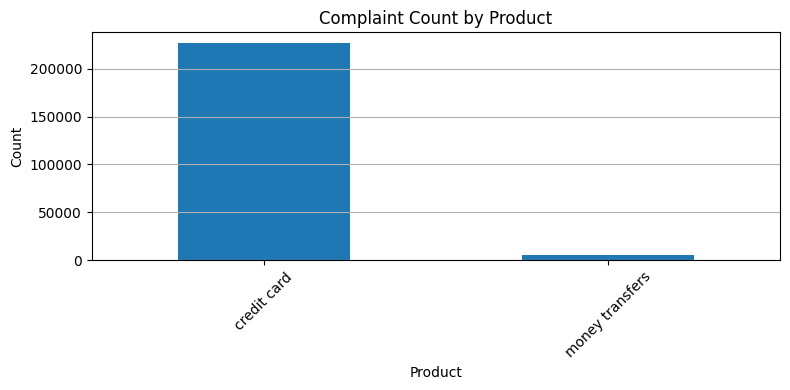

In [15]:
# Complaint count by product
filtered_df['product'].value_counts().plot(kind='bar', figsize=(8, 4), title='Complaint Count by Product')
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [16]:
# 💾 Save filtered data for next steps
filtered_df.to_csv("../data/filtered_complaints.csv", index=False)
print("✅ Cleaned dataset saved to data/filtered_complaints.csv")


✅ Cleaned dataset saved to data/filtered_complaints.csv


In [17]:
#Load the saved filtered data

df = pd.read_csv("../data/filtered_complaints.csv")
print("✅ Filtered data loaded. Shape:", df.shape)
df["consumer_complaint_narrative"].head(2)

C:\Users\Misirak\AppData\Local\Temp\ipykernel_15784\39840758.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/filtered_complaints.csv")


✅ Filtered data loaded. Shape: (232040, 18)


0    NaN
1    NaN
Name: consumer_complaint_narrative, dtype: object

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""  # or return np.nan if you prefer
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Misirak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Misirak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Apply cleaning to the complaint narratives
df["cleaned_narrative"] = df["consumer_complaint_narrative"].apply(clean_text)
df[["consumer_complaint_narrative", "cleaned_narrative"]].head(3)


,consumer_complaint_narrative,cleaned_narrative
0,NaN,
1,NaN,
2,NaN,


In [22]:
# Save the updated DataFrame for downstream tasks
df.to_csv("../data/cleaned_complaints.csv", index=False)
print("✅ Cleaned narratives saved to ../data/cleaned_complaints.csv")


✅ Cleaned narratives saved to ../data/cleaned_complaints.csv
